In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the dataset
file_path = '/content/heart.csv'
data = pd.read_csv(file_path)

# Identify categorical and numerical columns
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

# Replace zeros in RestingBP and Cholesterol with median values
data['RestingBP'] = data['RestingBP'].replace(0, data['RestingBP'].median())
data['Cholesterol'] = data['Cholesterol'].replace(0, data['Cholesterol'].median())

# Define target variable and features
X = data.drop('HeartDisease', axis=1)
y = data['HeartDisease']

# One-hot encode categorical variables and scale numerical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ]
)

# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build the ANN model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5141 - loss: 0.6894 - val_accuracy: 0.6735 - val_loss: 0.6011
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7703 - loss: 0.5487 - val_accuracy: 0.7619 - val_loss: 0.5169
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8146 - loss: 0.4600 - val_accuracy: 0.8027 - val_loss: 0.4609
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8352 - loss: 0.4137 - val_accuracy: 0.8163 - val_loss: 0.4406
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8461 - loss: 0.3733 - val_accuracy: 0.8027 - val_loss: 0.4173
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8552 - loss: 0.3457 - val_accuracy: 0.8231 - val_loss: 0.4115
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8627 - loss: 0.3303 - val_accuracy: 0.8231 - val_loss: 0.4090
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8584 - loss: 0.3250 - val_accuracy: 0.8231 - val_loss

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Optional: Save the model
model.save("heart_disease_ann_model.h5")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8439 - loss: 0.4084 
Test Accuracy: 0.86
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


<ipython-input-6-379df940fb2d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease', data=data, palette='viridis')


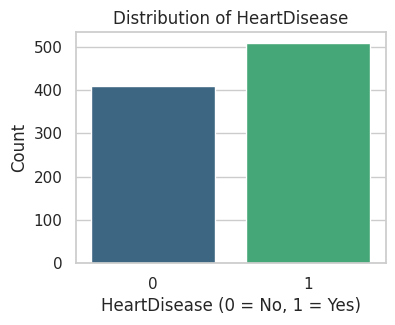

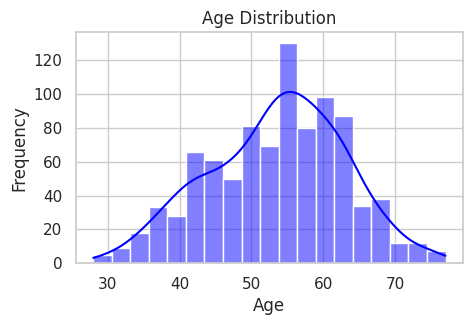

<ipython-input-6-379df940fb2d>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y='Cholesterol', data=data, palette='viridis')


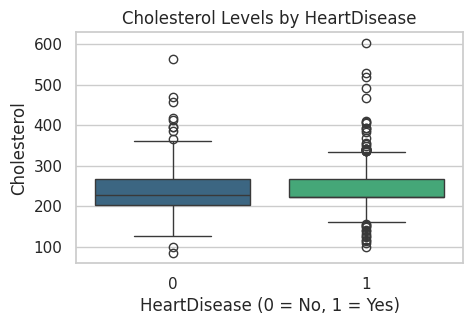

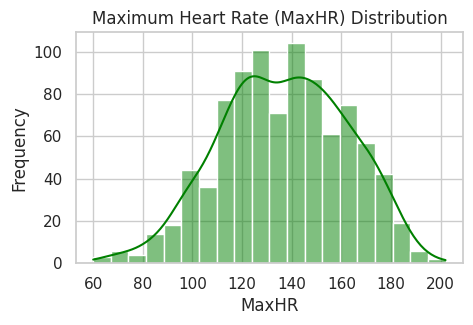

<ipython-input-6-379df940fb2d>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ChestPainType', data=data, palette='viridis', order=data['ChestPainType'].value_counts().index)


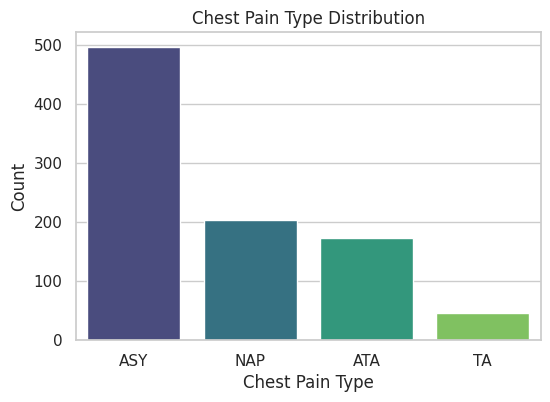

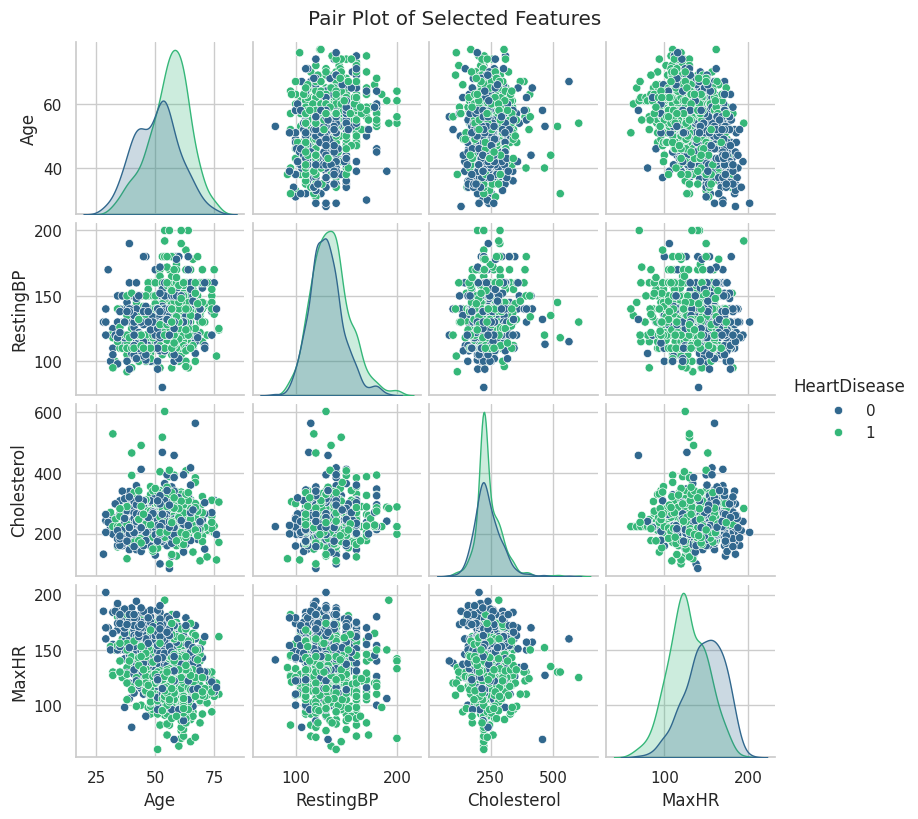

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")


# 2. Distribution of Target Variable (HeartDisease)
plt.figure(figsize=(4, 3))
sns.countplot(x='HeartDisease', data=data, palette='viridis')
plt.title("Distribution of HeartDisease")
plt.xlabel("HeartDisease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# 3. Age Distribution
plt.figure(figsize=(5, 3))
sns.histplot(data['Age'], kde=True, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# 4. Cholesterol vs. HeartDisease
plt.figure(figsize=(5, 3))
sns.boxplot(x='HeartDisease', y='Cholesterol', data=data, palette='viridis')
plt.title("Cholesterol Levels by HeartDisease")
plt.xlabel("HeartDisease (0 = No, 1 = Yes)")
plt.ylabel("Cholesterol")
plt.show()

# 5. Maximum Heart Rate (MaxHR) Distribution
plt.figure(figsize=(5, 3))
sns.histplot(data['MaxHR'], kde=True, color='green')
plt.title("Maximum Heart Rate (MaxHR) Distribution")
plt.xlabel("MaxHR")
plt.ylabel("Frequency")
plt.show()

# 6. Chest Pain Type Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='ChestPainType', data=data, palette='viridis', order=data['ChestPainType'].value_counts().index)
plt.title("Chest Pain Type Distribution")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.show()

# 7. Pair Plot for Selected Features
selected_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'HeartDisease']
sns.pairplot(data[selected_features], hue='HeartDisease', palette='viridis', diag_kind='kde', height=2)
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Calculate Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Calculate F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Accuracy: 0.8641
Precision: 0.8942
Recall: 0.8692
F1 Score: 0.8815


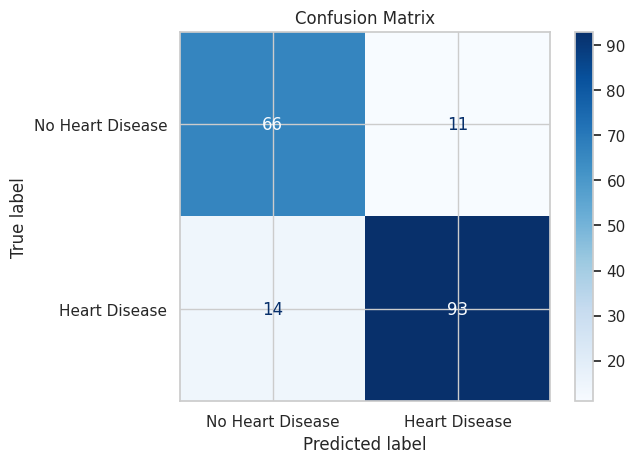

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Heart Disease", "Heart Disease"])
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optional: Add a classification report for more detailed metrics
report = classification_report(y_test, y_pred, target_names=["No Heart Disease", "Heart Disease"])
print("\nClassification Report:")
print(report)


Confusion Matrix:
[[66 11]
 [14 93]]

Classification Report:
                  precision    recall  f1-score   support

No Heart Disease       0.82      0.86      0.84        77
   Heart Disease       0.89      0.87      0.88       107

        accuracy                           0.86       184
       macro avg       0.86      0.86      0.86       184
    weighted avg       0.87      0.86      0.86       184

